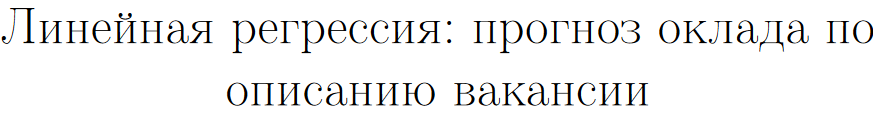

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from  sklearn.linear_model import Ridge 

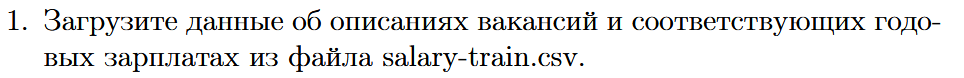

In [2]:
d_train = pd.read_csv('salary-train.csv')
# тестовая выборка для гребневой регрессии
d_test =  pd.read_csv('salary-test-mini.csv')

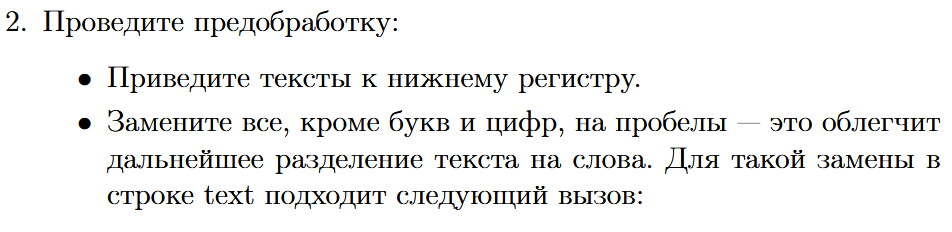
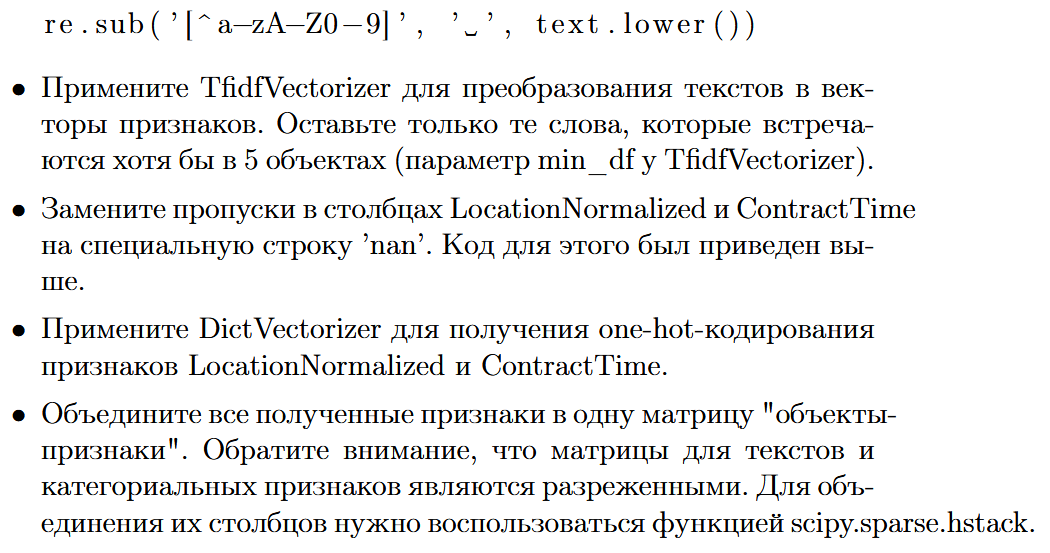

In [3]:
# текст  к нижнему регистру
d_train['FullDescription'] = d_train['FullDescription'].str.lower()
# замена на пробелы(кроме букв и цифр)
d_train['FullDescription'] = d_train['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex=True)

In [5]:
# преобразование текста в вектор признаков
tfidf_vectorizer = TfidfVectorizer(min_df=5)
X_train_text = tfidf_vectorizer.fit_transform(d_train['FullDescription'])
X_test_text = tfidf_vectorizer.transform(d_test["FullDescription"])
# заполнение пропусков
d_train['LocationNormalized'].fillna('nan', inplace=True)
d_train['ContractTime'].fillna('nan', inplace=True)

In [7]:
# примените DictVectorizer для получения one-hot-кодирования признаков LocationNormalized и ContractTime
enc = DictVectorizer()
X_train_cat = enc.fit_transform(d_train[["LocationNormalized", "ContractTime"]].to_dict("records"))
X_test_cat = enc.transform(d_test[["LocationNormalized", "ContractTime"]].to_dict("records"))

In [8]:
# объединение всех признаков в одну матрицу объекты-признаки
X_train = hstack([X_train_text, X_train_cat])
X_test = hstack([X_test_text, X_test_cat])

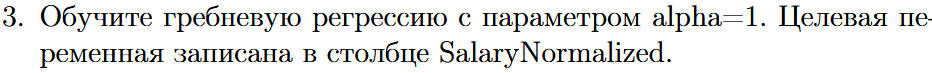

In [9]:
y_train = d_train["SalaryNormalized"] 
model = Ridge(alpha=1, random_state=241)
model.fit(X_train, y_train)

Ridge(alpha=1, random_state=241)

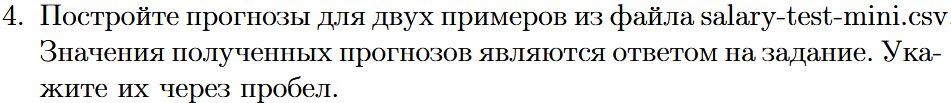

In [10]:
y_test = model.predict(X_test)
print(y_test[0], y_test[1])

56566.63905528289 37142.561878977984
